In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/Zomato data .csv')

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df['rate'] = df['rate'].str.split('/').str[0]
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
display(df.head())

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [7]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


There are no null values in the dataset.

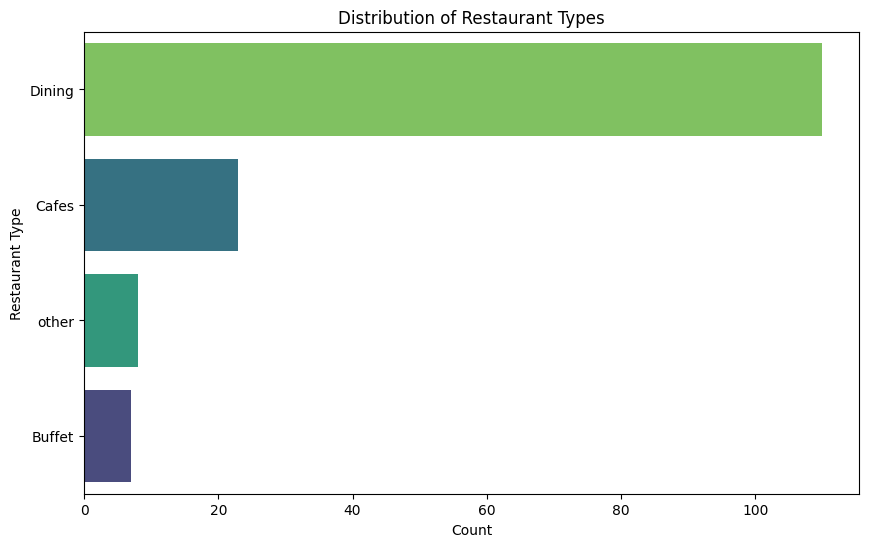

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='listed_in(type)', order = df['listed_in(type)'].value_counts().index, hue='listed_in(type)', palette='viridis', legend=False)
plt.title('Distribution of Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()

'Dining' is the most common type of restaurant.

In [14]:
votes_by_type = df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
display(votes_by_type)

,votes
listed_in(type),
Dining,20363
other,9367
Cafes,6434
Buffet,3028


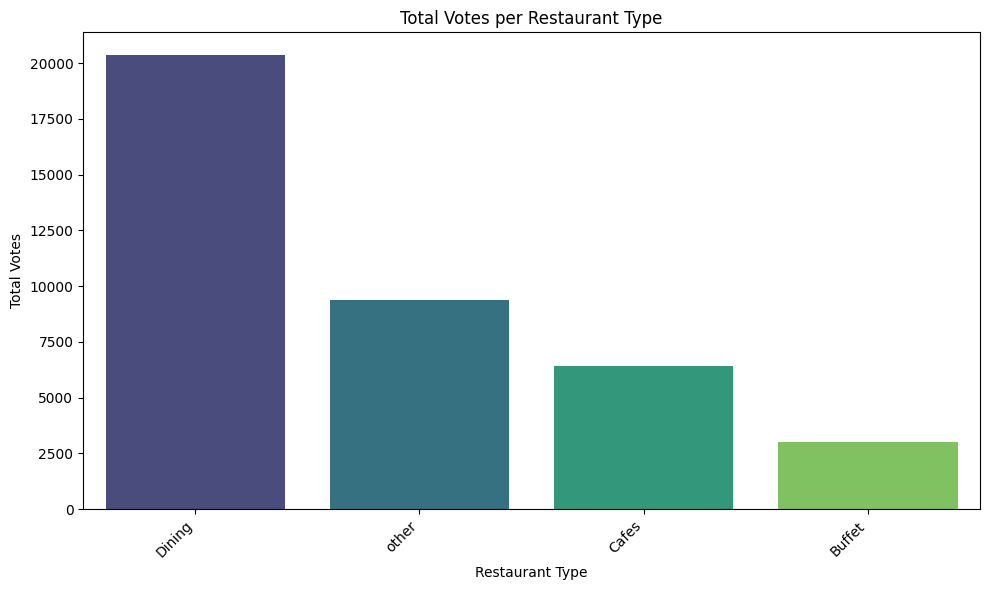

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=votes_by_type.index, y=votes_by_type.values, hue=votes_by_type.index, palette='viridis', legend=False)
plt.title('Total Votes per Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

'Dining' receives the most votes.

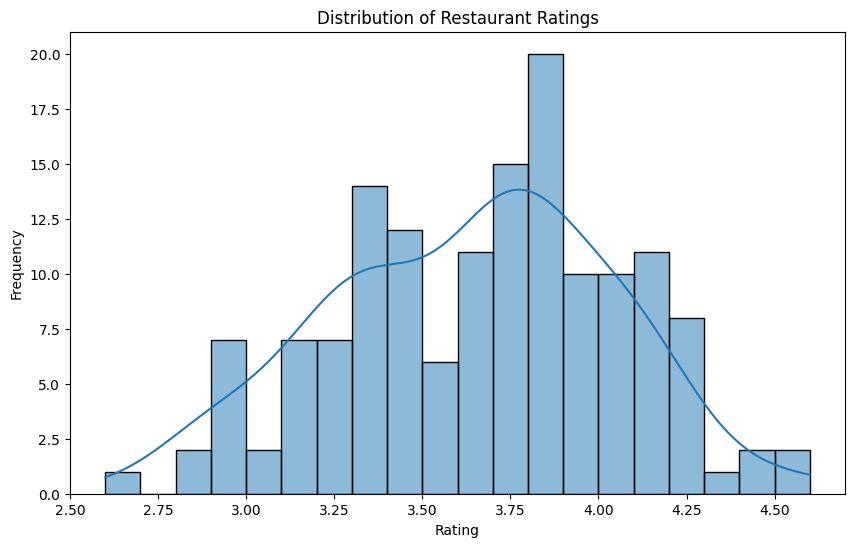

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rate', bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Most restaurants fall into the rating range of approximately 3.5 to 4.0.

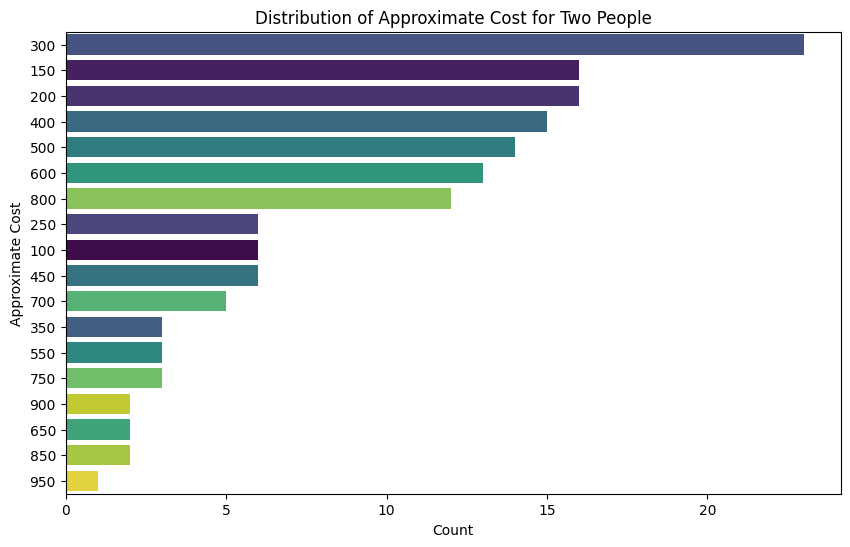

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='approx_cost(for two people)', order = df['approx_cost(for two people)'].value_counts().index, hue='approx_cost(for two people)', palette='viridis', legend=False)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Count')
plt.ylabel('Approximate Cost')
plt.show()

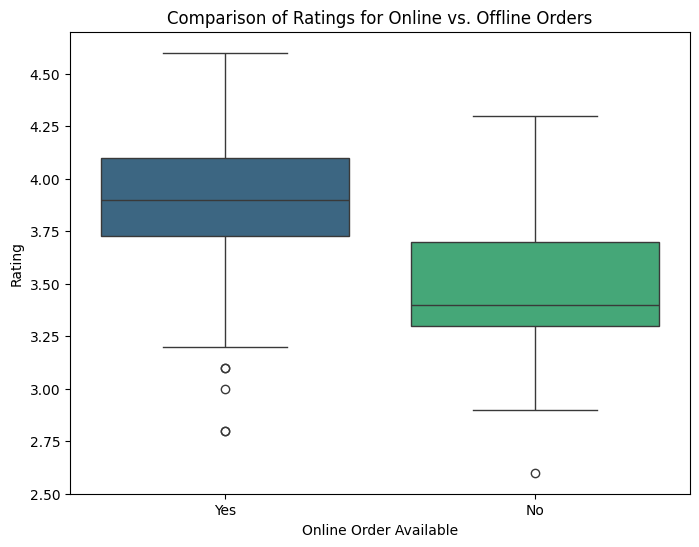

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='online_order', y='rate', hue='online_order', palette='viridis', legend=False)
plt.title('Comparison of Ratings for Online vs. Offline Orders')
plt.xlabel('Online Order Available')
plt.ylabel('Rating')
plt.show()

Restaurants with online ordering available tend to have slightly higher median ratings compared to those without online ordering.

In [22]:
online_order_pivot = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
display(online_order_pivot)

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


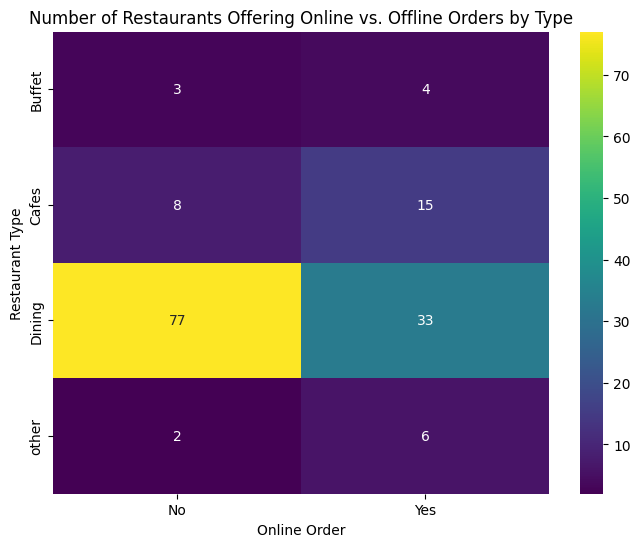

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(online_order_pivot, annot=True, fmt='d', cmap='viridis')
plt.title('Number of Restaurants Offering Online vs. Offline Orders by Type')
plt.xlabel('Online Order')
plt.ylabel('Restaurant Type')
plt.show()

In [24]:
online_orders_df = df[df['online_order'] == 'Yes']
average_online_cost = online_orders_df['approx_cost(for two people)'].mean()
print(f"The average spending for couples ordering online is: {average_online_cost:.2f}")

The average spending for couples ordering online is: 510.34


Based on the count plot of restaurant types, the majority of customers likely order from 'Dining' restaurants as they are the most common type.

From the calculation and plot of total votes per restaurant type, the total votes are:

Dining: 20363
other: 9367
Cafes: 6434
Buffet: 3028

'Dining' has received the most votes.

The histogram of restaurant ratings shows that the majority of restaurants have ratings in the range of approximately 3.5 to 4.0.

The average spending for couples ordering online is: 510.34

The box plot comparing ratings for online vs. offline orders indicates that restaurants with online ordering available tend to have slightly higher median ratings.

The heatmap visualizing online vs. offline orders by type clearly shows that 'Dining' restaurants received significantly more offline orders.
Zomato could consider providing offers to customers of 'Dining' restaurants who order offline.